 Importing the Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

 Data Inspection

In [2]:
train=pd.read_csv('train_v9rqX0R.csv')
test=pd.read_csv('test_AbJTz2l.csv')

In [3]:
train.shape,test.shape

((8523, 12), (5681, 11))

we have 8523 rowsand 12 columns in train data and 5681 rows and11 columns in test data.

In [4]:
# ratio of null values in train data
train.isnull().sum()/train.shape[0] *100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [5]:
# ratio of null values in test data
test.isnull().sum()/test.shape[0] *100

Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

we have null values in item-weight of 17% and outlet-size of 28%

In [6]:
#categorical features
categorical=train.select_dtypes(include=[np.object])
print('categorical features in train data:',categorical.shape[1])

#numerical featres
numerical = train.select_dtypes(include=[np.float64, np.int64])
print('Numerical features in test data:',numerical.shape[1])

categorical features in train data: 7
Numerical features in test data: 5


In [7]:
#categrical features 
categorical = test.select_dtypes(include=[np.object])
print('categorical features in test data:',categorical.shape[1])

#numerical features
numerical = test.select_dtypes(include=[np.float64,np.int64])
print('numerical features in test data:',numerical.shape[1])

categorical features in test data: 7
numerical features in test data: 4


Data Cleaning

In [8]:
train['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [9]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


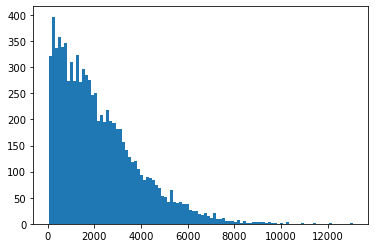

In [10]:
plt.hist('Item_Outlet_Sales',bins=100,data=train);

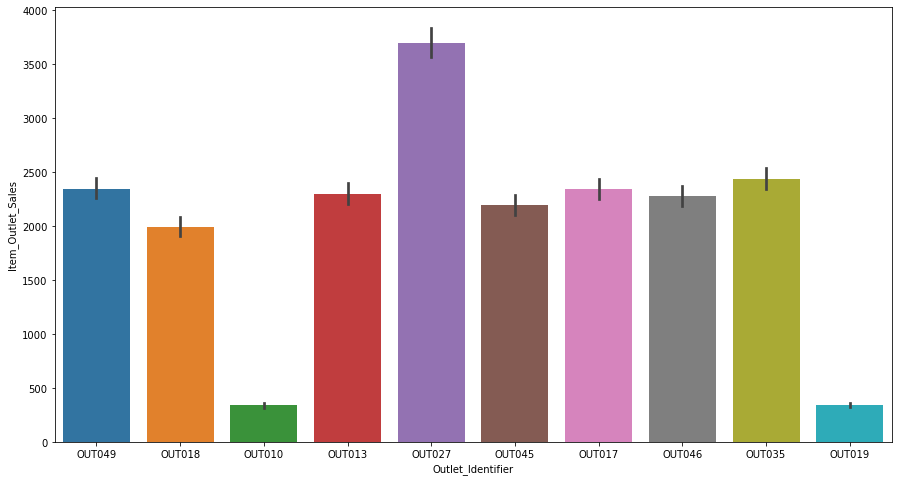

In [11]:
plt.figure(figsize=(15,8))
sns.barplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=train)

In [12]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

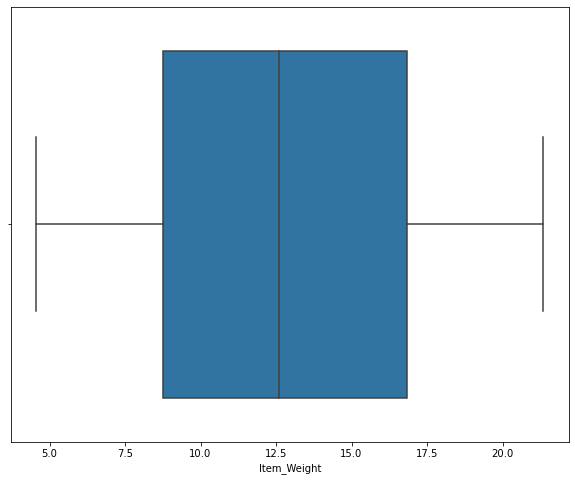

In [14]:
plt.figure(figsize=(10,8))
sns.boxplot('Item_Weight',data=train);

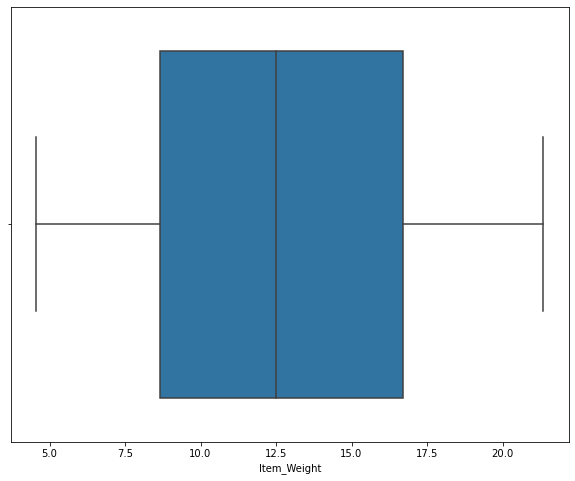

In [15]:
plt.figure(figsize=(10,8))
sns.boxplot('Item_Weight',data=test);

The box plot of Item-weight clearly shows,no outliers, hence the missing values will be filled with its mean

In [16]:
train['Item_Weight']=train['Item_Weight'].fillna(train['Item_Weight'].mean())
test['Item_Weight']=test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [17]:
train['Item_Weight'].isnull().sum(),test['Item_Weight'].isnull().sum()

(0, 0)

sucessfully missing values are imuted in the column Item_Weight

In [18]:
train['Outlet_Size'].isnull().sum(),test['Outlet_Size'].isnull().sum()

(2410, 1606)

In [19]:
print(train['Outlet_Size'].value_counts())
print('*********************************')
print(test['Outlet_Size'].value_counts())

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
*********************************
Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64


Outlet_Size column is of categorical, we can impute with mode

In [20]:
train['Outlet_Size']=train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])
test['Outlet_Size']=test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])

In [21]:
train['Outlet_Size'].isnull().sum(),test['Outlet_Size'].isnull().sum()

(0, 0)

sucessfully imputed Outlet_Size column missing values  with mode

Exploratory Data Analysis

In [22]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [23]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [24]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [25]:
test['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

their are some irregularities in the Item_Fat_Content needed to fix them

In [26]:
train['Item_Fat_Content'].replace(['low fat', 'LF','reg'],['Low Fat','Low Fat','Regular'],inplace=True)
test['Item_Fat_Content'].replace(['low fat', 'LF','reg'],['Low Fat','Low Fat','Regular'],inplace=True)

In [27]:
train['Item_Fat_Content']=train['Item_Fat_Content'].astype(str)

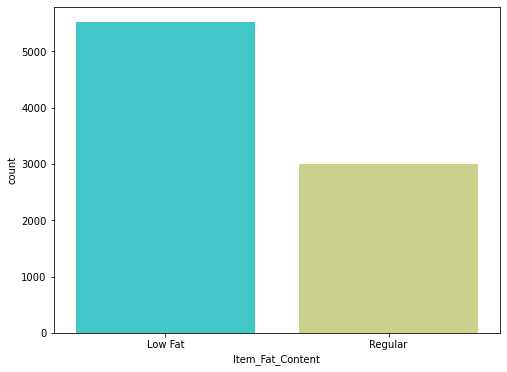

In [28]:
plt.figure(figsize=(8,6))
sns.countplot('Item_Fat_Content',data=train,palette='rainbow');

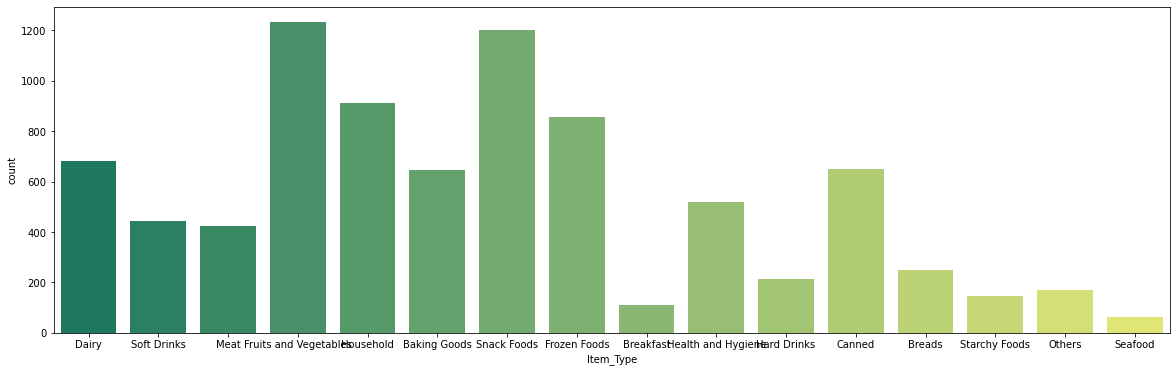

In [29]:
plt.figure(figsize=(20,6))
sns.countplot('Item_Type',data=train,palette='summer')

Fruits and Vegetables are largely sold as people tend to use them on daily purpose.
Snack Foods too have good sales.

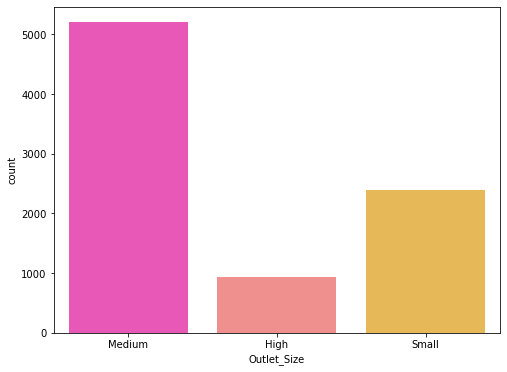

In [30]:
plt.figure(figsize=(8,6))
sns.countplot('Outlet_Size',data=train,palette='spring');

The Outlets are more of Medium Size

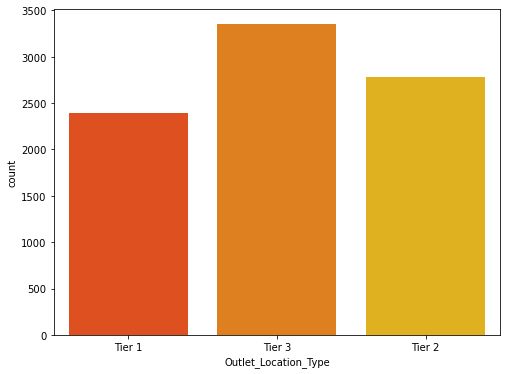

In [31]:
plt.figure(figsize=(8,6))
sns.countplot('Outlet_Location_Type',data=train,palette='autumn');

The Outlets are maximum in number in Tier 3 Cities

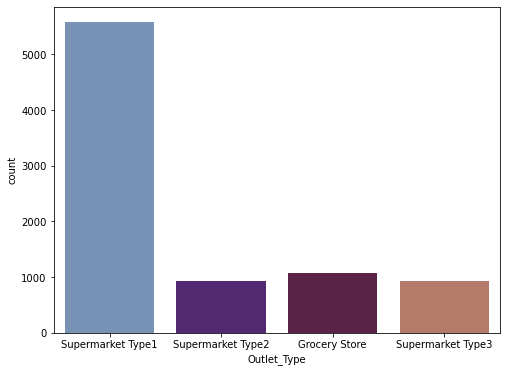

In [32]:
plt.figure(figsize=(8,6))
sns.countplot('Outlet_Type',data=train,palette='twilight');

The Outlets are more of Supermarket Type1

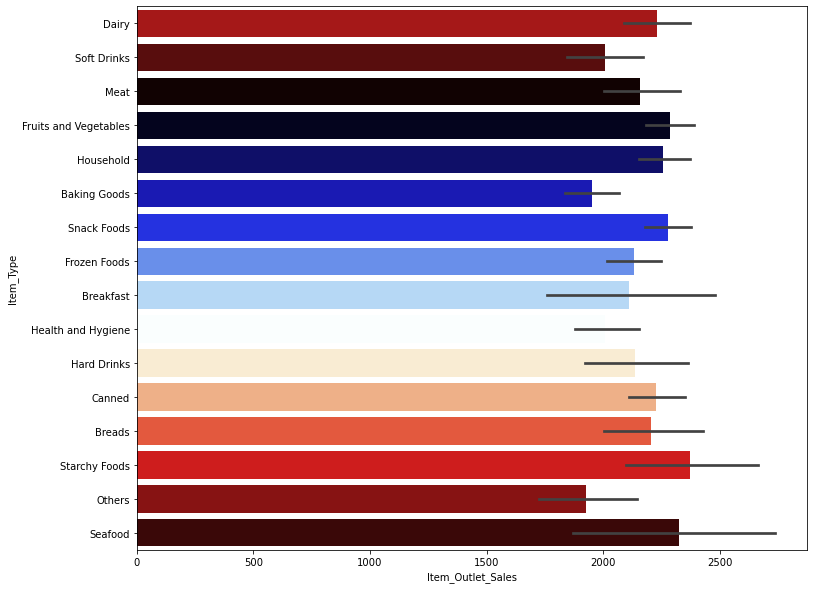

In [33]:
plt.figure(figsize=(12,10))
sns.barplot(y='Item_Type',x='Item_Outlet_Sales',data=train,palette='flag');

The products available were Fruits-Veggies and Snack Foods but the sales of Seafood and Starchy Foods seems higher and hence the sales can be improved with having stock of products that are most bought by customers.

 Building Model

In [34]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [35]:
#Label encoding
le=LabelEncoder()
var_mod=train.select_dtypes(include='object').columns

for i in var_mod:
    train[i]=le.fit_transform(train[i])
    
for i in var_mod:
    test[i] = le.fit_transform(test[i])

_Encoding the required columns from training and test dataset__

In [36]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [37]:
# Seperate Features and Target
X= train.drop(columns = ['Item_Outlet_Sales'], axis=1)
y= train['Item_Outlet_Sales']

In [38]:
# 20% data as validation set
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=22)

In [39]:
# Model Building
features= X.columns
LR = LinearRegression(normalize=True)
LR.fit(X_train,y_train)
y_pred = LR.predict(X_valid)
coef = pd.Series(LR.coef_,features).sort_values()

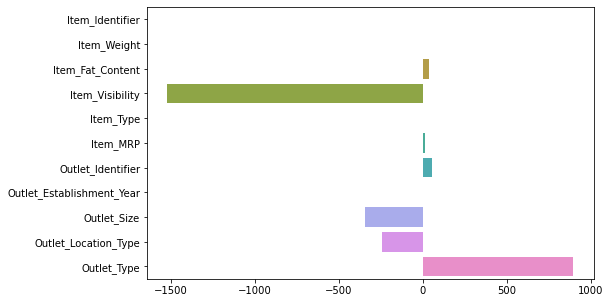

In [40]:
# Barplot for coefficients
plt.figure(figsize=(8,5))
sns.barplot(LR.coef_,features)

Item Visibility, Outlet_Type, Outlet_Size, Outlet_Location_Type are the most important attributes to determine Item_Outlet_Sales.

RMSE

In [41]:
MSE= metrics.mean_squared_error(y_valid,y_pred)
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 1246.1717725051317


Validation Set RMSE score is around 1246 from this linear model